# SQL 📚

## Tasks

**Please deliver the following:** 

1. A function named `stocks_2017` that returns a dataframe of all stock prices for the year of 2017. 
    - Drop all null values from this dataframe. 
    
2. Please create a file named `data_collection.py` within the `src` folder containing this function. 
3. Create a function called `begins_with_count`
    - This function should receive a letter and return the number of companies that begin with the given letter.
4. Create a histogram visualizing the distribution of these counts for every letter in the alphabet.
5. Interpret the histogram.

### How do I do this?

You have been given a database called `stocks.db` within the [data/](data/) folder of this repo. 
- This database contains the opening and closing prices for the S&P 500 from 2013-2018.

You will need to open up a connection to this database, construct an approproate SQL query, and move this code into a `stocks_2017` function.

<center><h3>DATABASE SCHEMA</h3></center>

<img src="../static/db_schema.png" width=500 height=500>

Please complete the assigned task below:

In [16]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

def stocks(year):
    conn = sqlite3.connect('../data/stocks.db')
    stocks = pd.read_sql(f'''
                  SELECT open,
                         close,
                         date,
                         name
                  FROM price
                  JOIN date
                  ON price.date_id = date.id
                  JOIN company
                  ON price.company_id = company.id
                  WHERE date BETWEEN date('{year}-01-01') and date('{year+1}-01-01')''', conn)
    
    stocks.date = pd.to_datetime(stocks.date)
    return stocks

In [3]:
df = stocks(2017)

In [13]:
import string

def begins_with_count(letter):
    return len(df[df.name.str.startswith(letter)].name.unique())

begins_with = {}
for letter in string.ascii_uppercase:
    begins_with[letter] = begins_with_count(letter)

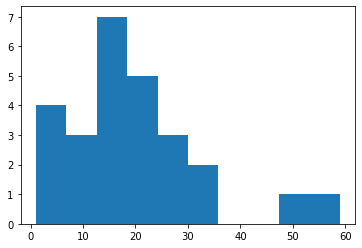

In [18]:
plt.hist(begins_with.values());